**30E03000 - Data Science for Business I (2022)**

# 

## Import libraries

In [358]:
import pandas as pd

#add all necessary libraries
import numpy as np #scientific computing
import itertools

#matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick #for percentage ticks

#sklearn for modeling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #Decision Tree algorithm
from sklearn.model_selection import train_test_split #Data split function
from sklearn.preprocessing import LabelEncoder #OneHotEncoding
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm

from sklearn.preprocessing import scale 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error



from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#Decision tree plot
import pydotplus
from IPython.display import Image

## Import data

In [359]:
#import the data into a Pandas dataframe and show it
company = pd.read_csv('https://raw.githubusercontent.com/Huyenptt113/Company-Bankruptcy-Prediction/main/company_bankruptcy.csv')

company.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,..

## Data exploration

In [360]:
company.shape

(6819, 96)

In [361]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [362]:
company.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.228813,0.323482,1.328641e+06,0.109091,0.184361,0.022408,0.847980,0.689146,0.689150,0.217639,5.508097e+09,1.566212e+06,0.264248,0.379677,4.032850e+05,8.376595e+06,0.630991,4.416337e+06,0.113177,0.886823,0.008783,...,0.522273,0.124095,3.592902e+06,3.715999e+07,0.090673,0.353828,0.277395,5.580680e+07,0.761599,0.735817,0.331410,5.416004e+07,0.934733,0.002549,0.029184,1.195856e+09,2.163735e+09,0.594006,2.471977e+09,0.671531,1.220121e+06,0.761599,0.331410,0.115645,0.649731,0.461849,0.593415,0.315582,0.031506,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686

In [363]:
company.duplicated().sum()

0

In [364]:
company[company.isna().any(axis=1)]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability


In [365]:
company = company.drop(columns = [' Net Income Flag'])

## Data visualization

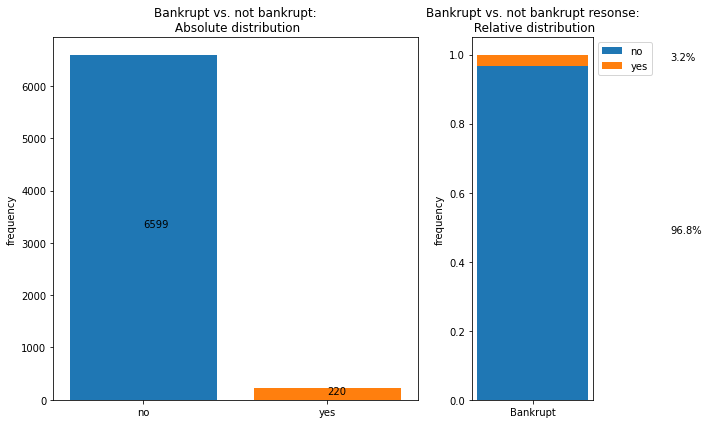

In [366]:
# plot 
keys, counts = np.unique(company['Bankrupt?'], return_counts=True)
counts_norm = counts/counts.sum()

fig = plt.figure(figsize=(10, 6)) #specify figure size
gs = gridspec.GridSpec(1, 2, width_ratios=[3,1]) #specify relative size of left and right plot

#Absolute values
ax0 = plt.subplot(gs[0])
ax0 = plt.bar(['no', 'yes'], counts, color=['#1f77b4','#ff7f0e']) #left bar plot
ax0 = plt.title('Bankrupt vs. not bankrupt:\n Absolute distribution') 
ax0 = plt.ylabel('frequency')
ax0 = plt.text(['no'], counts[0]/2, counts[0]) #add text box with count of non-fraudulent cases
ax0 = plt.text(['yes'], counts[1]/2, counts[1]) #add text box with count of fraudulent cases

#Normalized values
ax1 = plt.subplot(gs[1])
ax1 = plt.bar(['Bankrupt'], [counts_norm[0]], label='no')
ax1 = plt.bar(['Bankrupt'], [counts_norm[1]], bottom=counts_norm[0], label='yes')
ax1 = plt.legend(bbox_to_anchor=(1, 1))
ax1 = plt.title('Bankrupt vs. not bankrupt resonse:\n Relative distribution')
ax1 = plt.ylabel('frequency')
ax1 = plt.text(['Bankrupt?'],counts_norm[0]/2, '{}%'.format((counts_norm[0]*100).round(1)))
ax1 = plt.text(['Bankrupt?'],(counts_norm[1]/2)+counts_norm[0], '{}%'.format((counts_norm[1]*100).round(1)))

plt.tight_layout()
plt.show()

## Data preprocessing

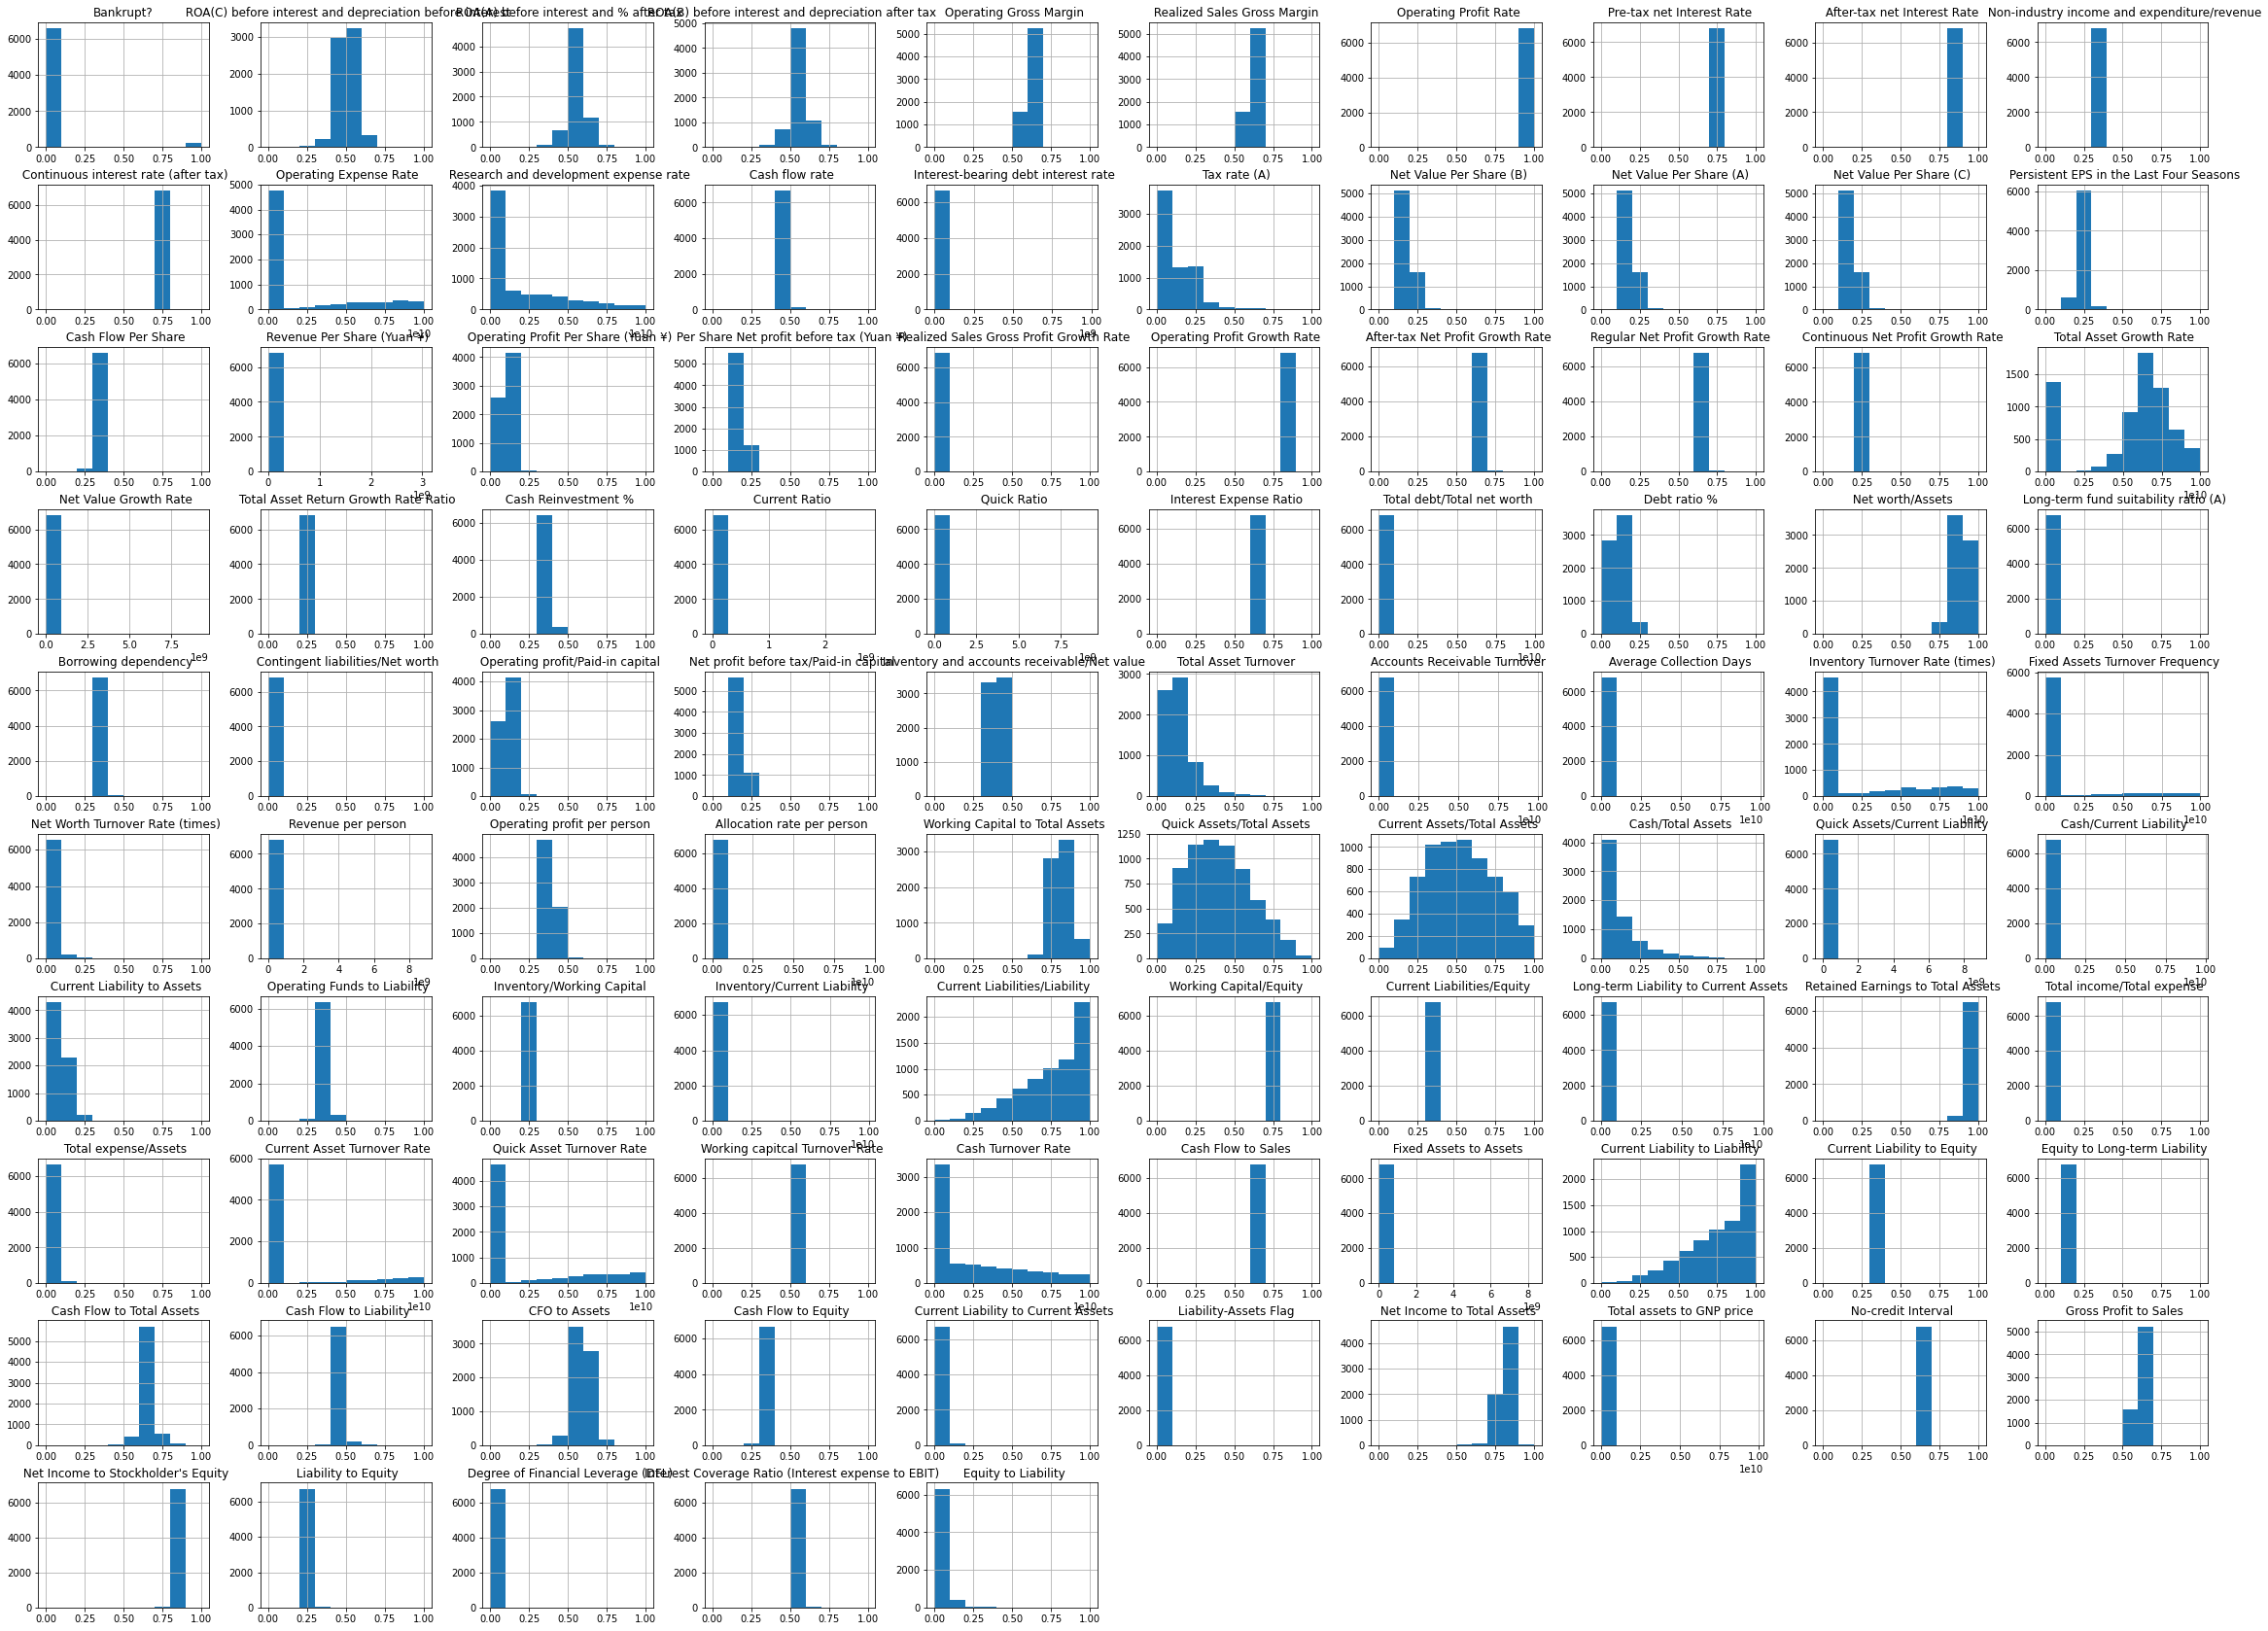

In [367]:
company.hist(figsize=(40,30), bins = 10)
plt.show()

In [368]:
corr_table=company.corr()
corr_table

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,-0.008395,-0.006083,-0.024232,-0.072356,-0.023063,-0.109706,-0.165399,-0.165465,-0.164784,-0.219560,-0.077516,-0.004692,-0.142051,-0.201395,-0.000458,-0.015168,-0.037783,-0.036820,-0.009401,-0.044431,0.065329,-0.016858,-0.051345,-0.002211,0.025058,-0.002681,0.012314,0.250161,-0.250161,0.016920,...,-0.086382,-0.044823,-0.100130,-0.003823,0.077921,0.194494,-0.077082,-0.001906,0.000822,-0.020809,-0.147221,0.153828,0.000778,-0.217779,-0.007137,0.139049,0.011929,0.025814,-0.002894,-0.018035,0.000479,0.066328,-0.020809,0.153828,0.139014,-0.070456,-0.043125,-0.115383,-0.058563,0.171306,0.139212,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,-0.083048
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,0.051328,0.066869,0.106461,0.323482,0.048882,0.250761,0.505580,0.505407,0.505281,0.775006,0.379839,-0.015932,0.687201,0.750564,0.000591,0.036511,0.115083,0.115040,0.025234,0.019635,-0.021930,0.079906,0.296158,0.013196,-0.026336,0.003988,-0.022208,-0.261427,0.261427,0.002967,...,0.181993,0.098820,0.235314,-0.010530,-0.046009,-0.210256,0.388151,-0.004447,0.013330,0.052783,0.103819,-0.142734,0.021508,0.650217,0.023450,-0.296019,0.005716,-0.027280,0.001824,-0.029477,0.011759,-0.009192,0.052783,-0.142734,-0.086535,0.262454,0.159699,0.504311,0.129002,-0.160725,-0.109272,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,0.052416
ROA(A) before interest and % after tax,-0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,0.049909,0.075727,0.084334,0.288440,0.050362,0.225897,0.531799,0.53

In [369]:
corr_table[(corr_table['Bankrupt?']>0.3) | ((corr_table['Bankrupt?']<-0.3))]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,-0.008395,-0.006083,-0.024232,-0.072356,-0.023063,-0.109706,-0.165399,-0.165465,-0.164784,-0.219560,-0.077516,-0.004692,-0.142051,-0.201395,-0.000458,-0.015168,-0.037783,-0.03682,-0.009401,-0.044431,0.065329,-0.016858,-0.051345,-0.002211,0.025058,-0.002681,0.012314,0.250161,-0.250161,0.016920,...,-0.086382,-0.044823,-0.100130,-0.003823,0.077921,0.194494,-0.077082,-0.001906,0.000822,-0.020809,-0.147221,0.153828,0.000778,-0.217779,-0.007137,0.139049,0.011929,0.025814,-0.002894,-0.018035,0.000479,0.066328,-0.020809,0.153828,0.139014,-0.070456,-0.043125,-0.115383,-0.058563,0.171306,0.139212,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,-0.083048
Net Income to Total Assets,-0.315457,0.887670,0.961552,0.912040,0.300143,0.298155,0.028482,0.048587,0.045390,0.028423,0.045600,0.071365,0.079169,0.281309,0.048735,0.231210,0.493776,0.493803,0.493822,0.691152,0.292252,-0.008315,0.577846,0.671748,0.003064,0.041046,0.119596,0.11987,0.024257,0.080031,-0.072408,0.062183,0.252716,0.014946,-0.017779,0.004969,-0.008056,-0.281422,0.281422,0.016566,...,0.176086,0.133053,0.195652,-0.008154,-0.034389,-0.214085,0.341188,0.000992,0.003639,0.066277,0.123817,-0.150319,0.023702,0.794189,0.027065,-0.470498,-0.005032,-0.023834,0.005680,-0.016255,0.011634,-0.004380,0.066277,-0.150319,-0.120242,0.254898,0.142567,0.440095,0.120228,-0.202751,-0.169104,1.000000,-0.105201,0.011942,0.300146,0.328492,-0.159697,-0.010463,0.012746,0.073916


In [370]:
corr_table.reset_index()
corr_table['Bankrupt?'].sort_values(ascending=False)[:20]


Bankrupt?                                       1.000000
 Debt ratio %                                   0.250161
 Current Liability to Assets                    0.194494
 Borrowing dependency                           0.176543
 Current Liability to Current Assets            0.171306
 Liability to Equity                            0.166812
 Current Liabilities/Equity                     0.153828
 Current Liability to Equity                    0.153828
 Liability-Assets Flag                          0.139212
 Total expense/Assets                           0.139049
 Equity to Long-term Liability                  0.139014
 Cash/Current Liability                         0.077921
 Inventory and accounts receivable/Net value    0.075278
 Fixed Assets Turnover Frequency                0.072818
 Contingent liabilities/Net worth               0.070455
 Fixed Assets to Assets                         0.066328
 Net Value Growth Rate                          0.065329
 Revenue per person            

In [371]:
corr_table['Bankrupt?'].sort_values(ascending=False)[-20:]

 Cash/Total Assets                                         -0.100130
 Tax rate (A)                                              -0.109706
 CFO to Assets                                             -0.115383
 Operating profit/Paid-in capital                          -0.141111
 Operating Profit Per Share (Yuan ¥)                       -0.142051
 Working Capital/Equity                                    -0.147221
 Net Value Per Share (C)                                   -0.164784
 Net Value Per Share (B)                                   -0.165399
 Net Value Per Share (A)                                   -0.165465
 Net Income to Stockholder's Equity                        -0.180987
 Working Capital to Total Assets                           -0.193083
 Per Share Net profit before tax (Yuan ¥)                  -0.201395
 Net profit before tax/Paid-in capital                     -0.207857
 Retained Earnings to Total Assets                         -0.217779
 Persistent EPS in the Last Four S

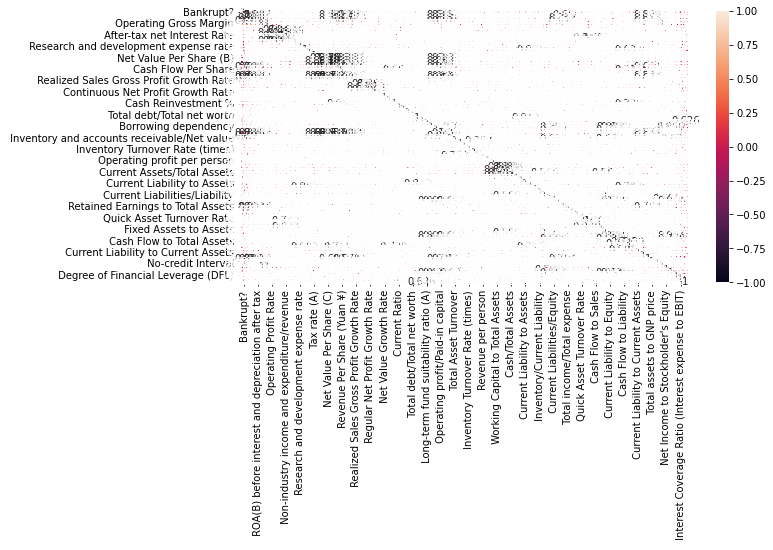

In [372]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(company.corr(), annot=True, fmt=".3g")
plt.show()

## Scale data

In [373]:
from sklearn.preprocessing import StandardScaler
label = company['Bankrupt?']
scaled = StandardScaler().fit_transform(company.drop(columns = ['Bankrupt?']))
company_scale = pd.DataFrame(scaled)
company_scaled = pd.concat([label, company_scale], axis=1)

In [374]:
company_scaled.columns=company.columns

In [375]:
company_scaled.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,-0.616334,-0.750713,-0.545256,-0.151921,-0.829388,-1.279247,-1.275228,-1.276147,-1.794106,-0.671081,-0.025697,-0.471371,-1.375150,-0.025299,0.019997,-0.012031,-0.012262,-0.010299,-0.182259,-0.013721,-0.119118,-0.769297,-0.012111,-0.034237,-0.092520,-0.026226,1.750845,-1.750845,-0.133505,...,-1.155833,-1.520572,-0.861820,-0.020937,-0.072818,1.126267,-0.563752,-0.045371,-0.095887,-0.412896,-1.245334,0.568487,-0.094979,-1.232594,-0.043610,1.314027,-0.175421,1.299751,-0.019619,-0.685397,0.003948,-0.012111,-0.412896,0.568487,0.558428,-0.257031,-0.108218,-1.247231,-0.206594,2.812493,-0.034272,-2.254317,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,-0.622067
1,1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,-0.616334,-0.750713,-0.326632,-0.151921,-0.829388,-0.251878,-0.250429,-0.251550,-0.597379,-0.303533,-0.025697,-0.550058,-0.435312,-0.027130,0.010035,0.039473,0.039663,-0.001930,0.207732,-0.013721,0.027847,-0.143117,-0.012111,-0.034237,0.372093,-0.026226,1.075727,-1.075727,-0.132282,...,-1.351081,-1.558280,-0.783873,-0.020937,-0.072818,-0.670363,-0.361990,1.169887,-0.095887,-2.192039,-0.328953,-0.123797,-0.094979,-0.143474,-0.026740,-0.135126,-0.423919,1.640522,-0.010126,0.006134,0.004193,-0.012111,-2.192039,-0.123797,0.269947,-0.182201,-0.095129,-0.449376,-0.109511,0.527485,-0.034272,-0.309033,-0.049491,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,-0.535573
2,1,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,-0.086566,-0.616334,-0.740898,-0.523098,-0.151921,-0.829388,-0.381876,-0.380102,0.090822,-1.450153,-0.930172,-0.025697,-0.599601,-1.252

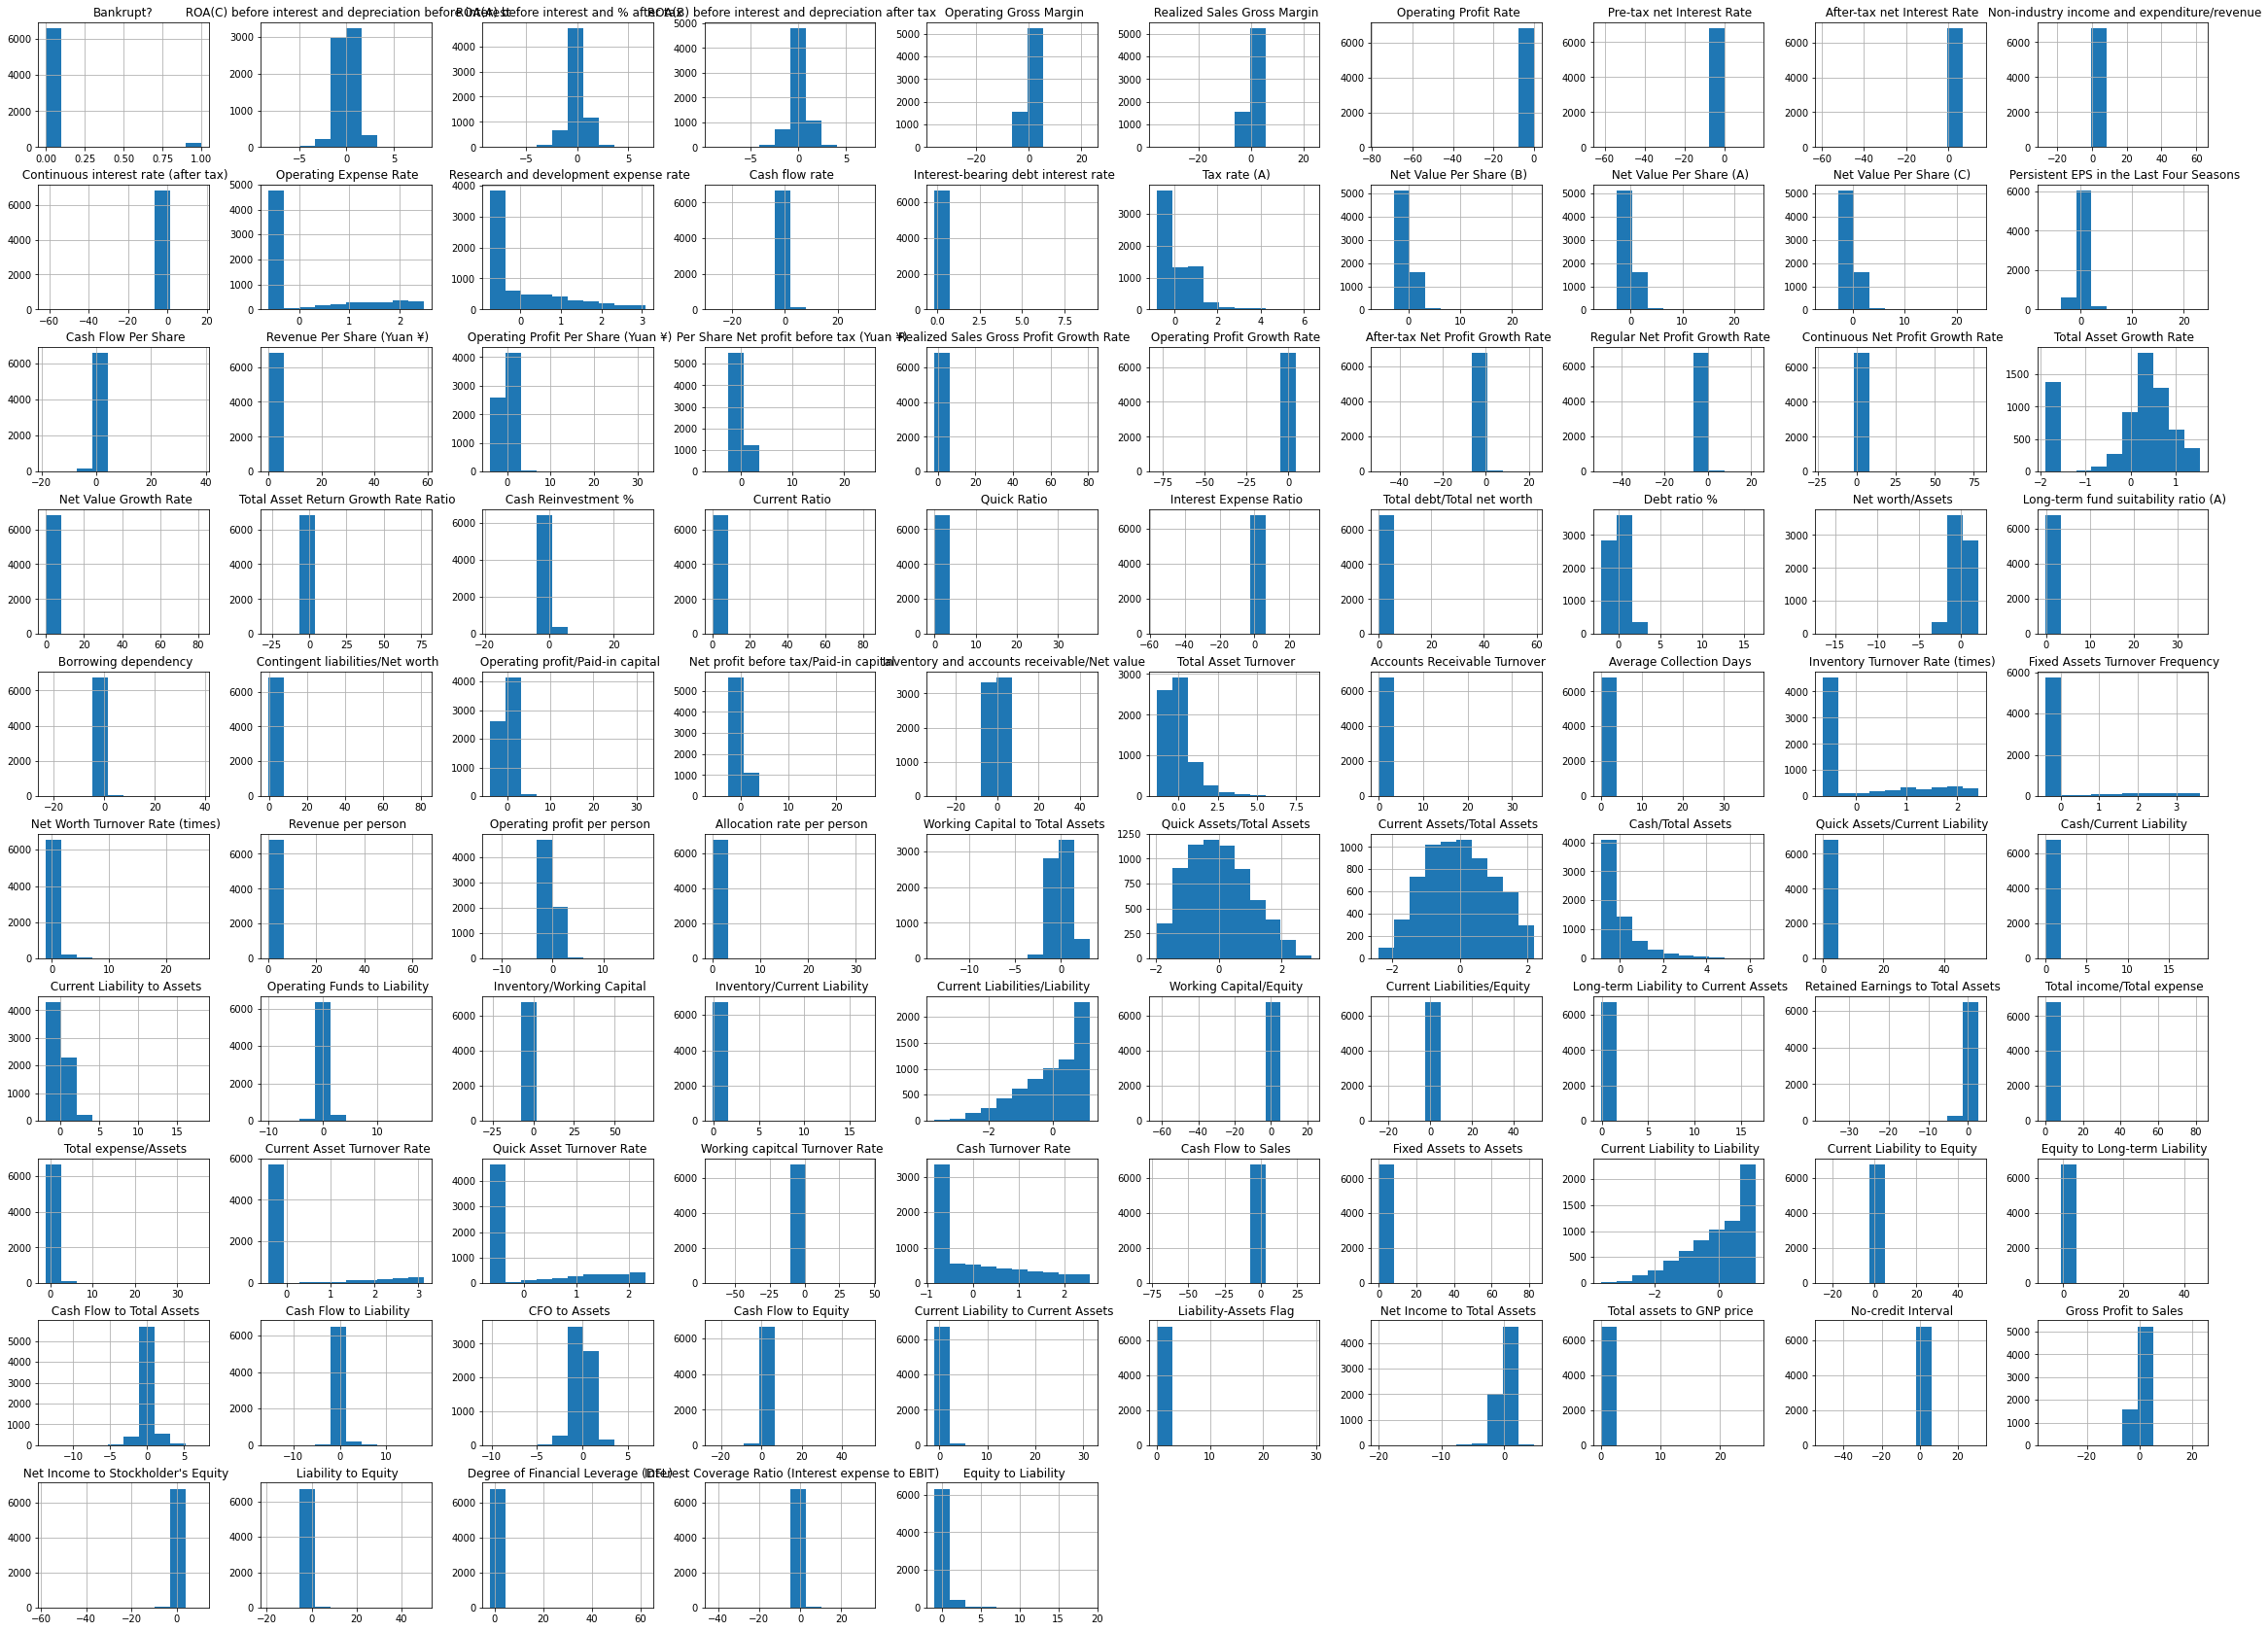

In [376]:
company_scaled.hist(figsize=(40,30))
plt.show()

In [377]:
corr_table2=company_scaled.corr()
corr_table2

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,-0.008395,-0.006083,-0.024232,-0.072356,-0.023063,-0.109706,-0.165399,-0.165465,-0.164784,-0.219560,-0.077516,-0.004692,-0.142051,-0.201395,-0.000458,-0.015168,-0.037783,-0.036820,-0.009401,-0.044431,0.065329,-0.016858,-0.051345,-0.002211,0.025058,-0.002681,0.012314,0.250161,-0.250161,0.016920,...,-0.086382,-0.044823,-0.100130,-0.003823,0.077921,0.194494,-0.077082,-0.001906,0.000822,-0.020809,-0.147221,0.153828,0.000778,-0.217779,-0.007137,0.139049,0.011929,0.025814,-0.002894,-0.018035,0.000479,0.066328,-0.020809,0.153828,0.139014,-0.070456,-0.043125,-0.115383,-0.058563,0.171306,0.139212,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,-0.083048
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,0.051328,0.066869,0.106461,0.323482,0.048882,0.250761,0.505580,0.505407,0.505281,0.775006,0.379839,-0.015932,0.687201,0.750564,0.000591,0.036511,0.115083,0.115040,0.025234,0.019635,-0.021930,0.079906,0.296158,0.013196,-0.026336,0.003988,-0.022208,-0.261427,0.261427,0.002967,...,0.181993,0.098820,0.235314,-0.010530,-0.046009,-0.210256,0.388151,-0.004447,0.013330,0.052783,0.103819,-0.142734,0.021508,0.650217,0.023450,-0.296019,0.005716,-0.027280,0.001824,-0.029477,0.011759,-0.009192,0.052783,-0.142734,-0.086535,0.262454,0.159699,0.504311,0.129002,-0.160725,-0.109272,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,0.052416
ROA(A) before interest and % after tax,-0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,0.049909,0.075727,0.084334,0.288440,0.050362,0.225897,0.531799,0.53

In [378]:
corr_table2[(corr_table2['Bankrupt?']>0.3) | ((corr_table2['Bankrupt?']<-0.3))]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,-0.008395,-0.006083,-0.024232,-0.072356,-0.023063,-0.109706,-0.165399,-0.165465,-0.164784,-0.219560,-0.077516,-0.004692,-0.142051,-0.201395,-0.000458,-0.015168,-0.037783,-0.03682,-0.009401,-0.044431,0.065329,-0.016858,-0.051345,-0.002211,0.025058,-0.002681,0.012314,0.250161,-0.250161,0.016920,...,-0.086382,-0.044823,-0.100130,-0.003823,0.077921,0.194494,-0.077082,-0.001906,0.000822,-0.020809,-0.147221,0.153828,0.000778,-0.217779,-0.007137,0.139049,0.011929,0.025814,-0.002894,-0.018035,0.000479,0.066328,-0.020809,0.153828,0.139014,-0.070456,-0.043125,-0.115383,-0.058563,0.171306,0.139212,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,-0.083048
Net Income to Total Assets,-0.315457,0.887670,0.961552,0.912040,0.300143,0.298155,0.028482,0.048587,0.045390,0.028423,0.045600,0.071365,0.079169,0.281309,0.048735,0.231210,0.493776,0.493803,0.493822,0.691152,0.292252,-0.008315,0.577846,0.671748,0.003064,0.041046,0.119596,0.11987,0.024257,0.080031,-0.072408,0.062183,0.252716,0.014946,-0.017779,0.004969,-0.008056,-0.281422,0.281422,0.016566,...,0.176086,0.133053,0.195652,-0.008154,-0.034389,-0.214085,0.341188,0.000992,0.003639,0.066277,0.123817,-0.150319,0.023702,0.794189,0.027065,-0.470498,-0.005032,-0.023834,0.005680,-0.016255,0.011634,-0.004380,0.066277,-0.150319,-0.120242,0.254898,0.142567,0.440095,0.120228,-0.202751,-0.169104,1.000000,-0.105201,0.011942,0.300146,0.328492,-0.159697,-0.010463,0.012746,0.073916


In [379]:
corr_table2.reset_index()
corr_table2['Bankrupt?'].sort_values(ascending=False)[:20]


Bankrupt?                                       1.000000
 Debt ratio %                                   0.250161
 Current Liability to Assets                    0.194494
 Borrowing dependency                           0.176543
 Current Liability to Current Assets            0.171306
 Liability to Equity                            0.166812
 Current Liabilities/Equity                     0.153828
 Current Liability to Equity                    0.153828
 Liability-Assets Flag                          0.139212
 Total expense/Assets                           0.139049
 Equity to Long-term Liability                  0.139014
 Cash/Current Liability                         0.077921
 Inventory and accounts receivable/Net value    0.075278
 Fixed Assets Turnover Frequency                0.072818
 Contingent liabilities/Net worth               0.070455
 Fixed Assets to Assets                         0.066328
 Net Value Growth Rate                          0.065329
 Revenue per person            

In [380]:
corr_table2['Bankrupt?'].sort_values(ascending=False)[-20:]

 Cash/Total Assets                                         -0.100130
 Tax rate (A)                                              -0.109706
 CFO to Assets                                             -0.115383
 Operating profit/Paid-in capital                          -0.141111
 Operating Profit Per Share (Yuan ¥)                       -0.142051
 Working Capital/Equity                                    -0.147221
 Net Value Per Share (C)                                   -0.164784
 Net Value Per Share (B)                                   -0.165399
 Net Value Per Share (A)                                   -0.165465
 Net Income to Stockholder's Equity                        -0.180987
 Working Capital to Total Assets                           -0.193083
 Per Share Net profit before tax (Yuan ¥)                  -0.201395
 Net profit before tax/Paid-in capital                     -0.207857
 Retained Earnings to Total Assets                         -0.217779
 Persistent EPS in the Last Four S

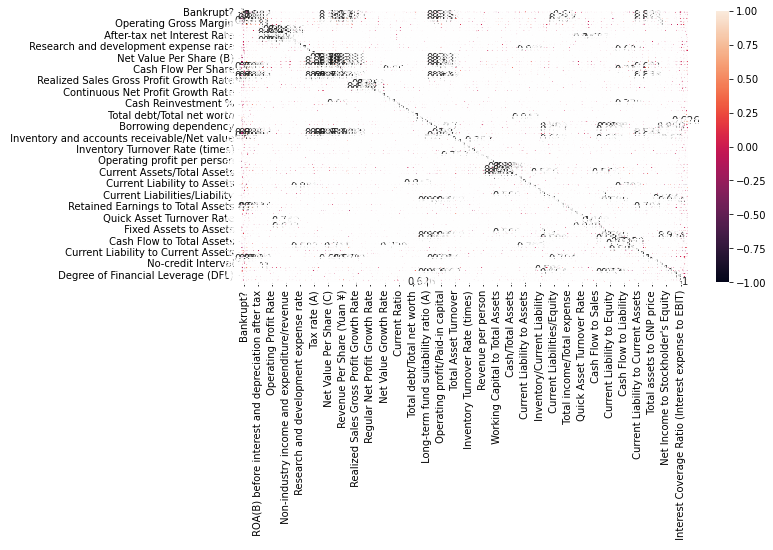

In [381]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(company_scaled.corr(), annot=True, fmt=".3g")
plt.show()

# Feature selection 

In [382]:
from numpy.ma.core import correlate
for (columnName, columnData) in company_scaled.iteritems():
  for (columnName2, columnData2) in company_scaled.iteritems():
    if columnData2.max() == columnData2.median() or columnData2.min() == columnData2.median() and columnName2 != "Bankrupt?":
      company_scaled = company_scaled.drop(columnName2, axis = 1)
      print(columnName2)
    if columnName != columnName2 and pd.Series.corr(columnData,columnData2) > 0.7 or pd.Series.corr(columnData,columnData2) < -0.7:
      company_scaled = company_scaled.drop(columnName2, axis = 1)
    
#      print(columnName2)

 Liability-Assets Flag


In [383]:
company_scaled.shape

(6819, 43)

## Data split

In [384]:
X, y = company_scaled.loc[:, company_scaled.columns != 'Bankrupt?'], company_scaled['Bankrupt?'] #define feature matrix X and labels y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234) #split data 70:30

<Figure size 720x432 with 0 Axes>

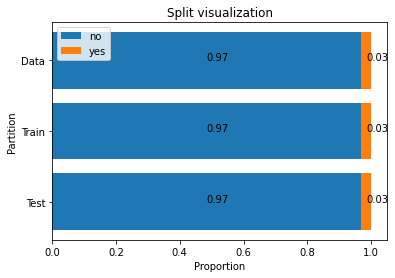

In [385]:
plt.figure(figsize=(10, 6))
train_dist = y_train.value_counts() / len(y_train) #normalize absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
data_dist = company_scaled['Bankrupt?'].value_counts() / len(company_scaled)

fig, ax = plt.subplots()

ax.barh(['Test','Train','Data'], [test_dist[0], train_dist[0], data_dist[0]], color='#1f77b4', label='no')
ax.barh(['Test','Train','Data'], [test_dist[1], train_dist[1], data_dist[1]], left=[test_dist[0], train_dist[0], data_dist[0]], color='#ff7f0e', label='yes')
ax.set_title('Split visualization')
ax.legend(loc='upper left')
plt.xlabel('Proportion')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip(['Test', 'Train','Data'], [test_dist[0], train_dist[0], data_dist[0]], [test_dist[1], train_dist[1], data_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

plt.show()


# Decision Tree Model

## Build an (unbalanced) Decision Tree model

In [386]:
#Define Decision tree classifier with some default parameters
clf = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=3)

#Fit the training data 
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=100)

In [387]:
y_pred_imb = clf.predict(X_test)
y_predProba_imb = clf.predict_proba(X_test)
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_imb)*100).round(2))

Accuracy is:  96.77


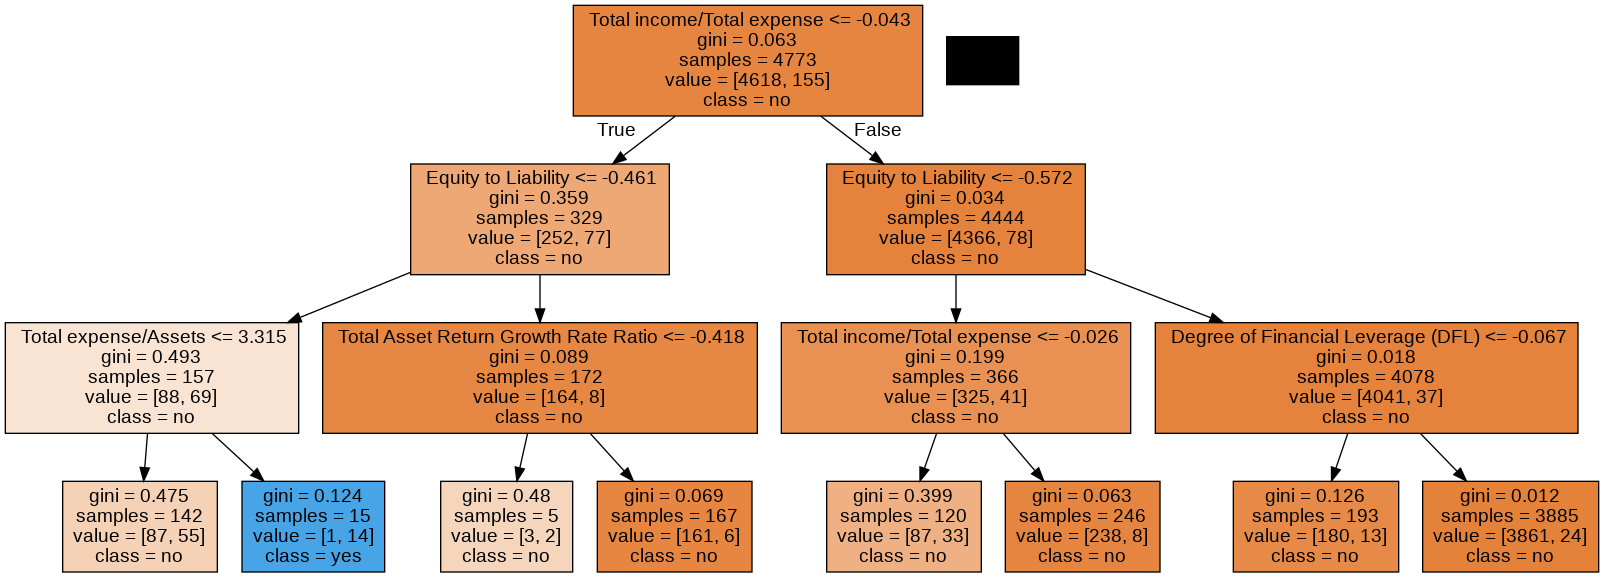

In [388]:
'''
The graphviz library is used to visualize the tree. 
'''

#Decision tree plot
import pydotplus
from IPython.display import Image 

# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns, 
                                class_names=['no', 'yes'], filled=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


In [389]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_order = np.array([X.columns.values])
i = np.argsort(importances)[::-1]
feature_order = feature_order[:,i]

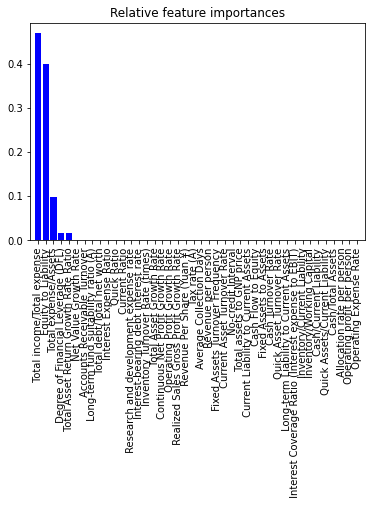

In [390]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Relative feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b",  align="center")
plt.xticks(range(X.shape[1]), feature_order[0], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## Rebalancing with SMOTE

In [391]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

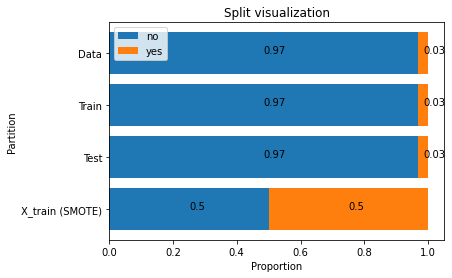

In [392]:
train_dist = y_train.value_counts() / len(y_train) #normalize absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
data_dist = y.value_counts() / len(y)
smote_dist = pd.Series(y_sm).value_counts() / len(pd.Series(y_sm))

fig, ax = plt.subplots()

ax.barh(['X_train (SMOTE)','Test','Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='#1f77b4', label='no')
ax.barh(['X_train (SMOTE)','Test','Train','Data'], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]], left=[smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='#ff7f0e', label='yes')
ax.set_title('Split visualization')
ax.legend(loc='upper left')
plt.xlabel('Proportion')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip(['X_train (SMOTE)', 'Test', 'Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

## Build a balanced Decision Tree model

In [393]:
#Define Decision tree classifier with some default parameters
clf2 = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=3)

#Fit the training data 
clf2.fit(X_sm,y_sm)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=100)

In [394]:
y_pred_bal = clf2.predict(X_test)
y_predProba_bal = clf2.predict_proba(X_test)
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_bal)*100).round(2))

Accuracy is:  83.24


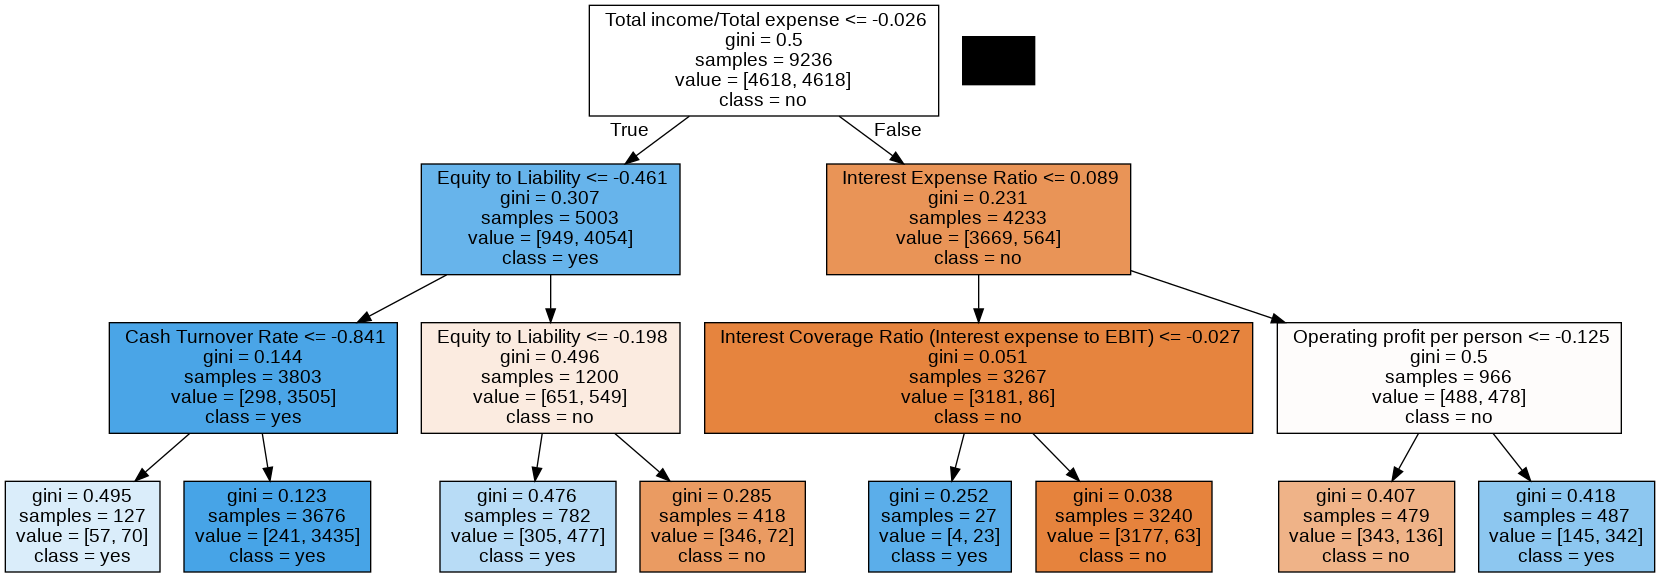

In [395]:
'''
The graphviz library is used to visualize the tree. 
'''

#Decision tree plot
import pydotplus
from IPython.display import Image 

# Create DOT data
dot_data2 = tree.export_graphviz(clf2, out_file=None, 
                                feature_names=X_sm.columns, 
                                class_names=['no', 'yes'], filled=True)

# Draw graph
graph2 = pydotplus.graph_from_dot_data(dot_data2)  

# Show graph
Image(graph2.create_png())


In [396]:
importances2 = clf.feature_importances_
indices2 = np.argsort(importances2)[::-1]
feature_order2 = np.array([X.columns.values])
i = np.argsort(importances2)[::-1]
feature_order2 = feature_order[:,i]

In [397]:
feature_order2

array([[' Fixed Assets to Assets', ' Operating Expense Rate',
        ' Cash Turnover Rate', ' Allocation rate per person',
        ' Quick Ratio', ' Interest Expense Ratio',
        ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate',
        ' Inventory Turnover Rate (times)',
        ' Interest-bearing debt interest rate',
        ' Research and development expense rate', ' Current Ratio',
        ' Equity to Liability', ' Total expense/Assets',
        ' Realized Sales Gross Profit Growth Rate',
        ' Total debt/Total net worth',
        ' Long-term fund suitability ratio (A)',
        ' Accounts Receivable Turnover', ' Net Value Growth Rate',
        ' Total Asset Return Growth Rate Ratio',
        ' Degree of Financial Leverage (DFL)',
        ' Operating Profit Growth Rate', ' Tax rate (A)',
        ' Revenue Per Share (Yuan ¥)', ' Quick Asset Turnover Rate',
        ' Cash/Total Assets', ' Quick Assets/Current Liability',
        ' Cash/Current Liability', ' In

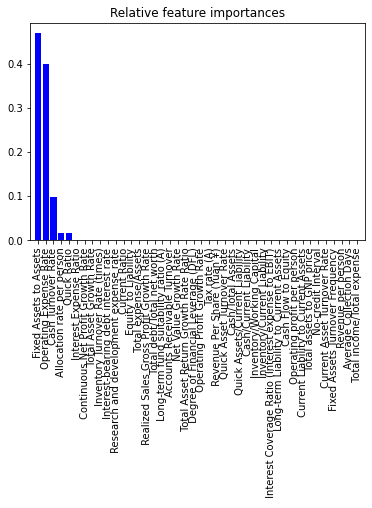

In [398]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Relative feature importances")
plt.bar(range(X.shape[1]), importances2[indices2],
       color="b",  align="center")
plt.xticks(range(X.shape[1]), feature_order2[0], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Logistics Regression model

## Unbalanced Logistics regression model

In [399]:
lr_imb = LogisticRegression().fit(X_train, y_train) #define Logistic Regression classifier

In [400]:
y_pred_lr_imb = lr_imb.predict(X_test)
y_predProba_lr_imb = lr_imb.predict_proba(X_test)
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_lr_imb)*100).round(2))

Accuracy is:  96.53


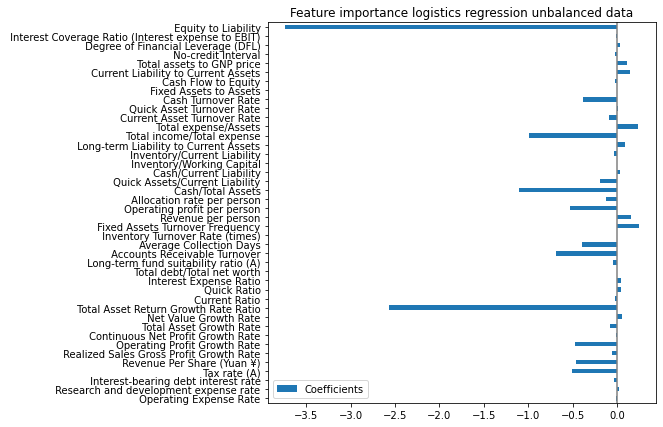

In [401]:
coefs = pd.DataFrame(
   lr_imb.coef_.reshape(X.shape[1],1),
   columns=['Coefficients'], index=X_train.columns
)
coefs.plot(kind='barh', figsize=(9, 7),)
plt.title('Feature importance logistics regression unbalanced data')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

## Balanced Logistics regression model

In [402]:
lr_bal = LogisticRegression().fit(X_sm, y_sm) #define Logistic Regression classifier

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [403]:
y_pred_lr_bal = lr_bal.predict(X_test)
y_predProba_lr_bal = lr_bal.predict_proba(X_test)
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_lr_bal)*100).round(2))

Accuracy is:  84.85


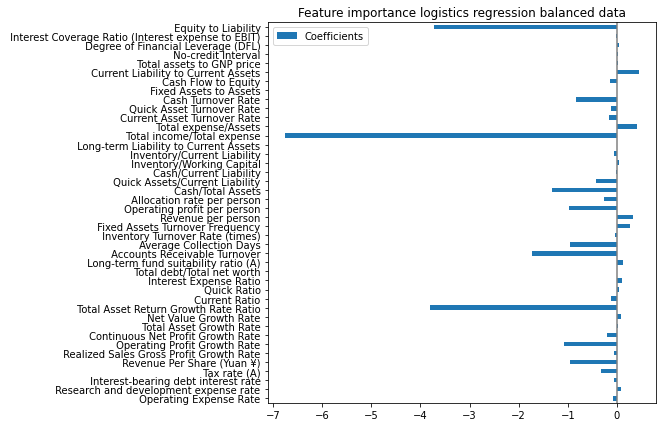

In [404]:
coefs = pd.DataFrame(
   lr_bal.coef_.reshape(X.shape[1],1),
   columns=['Coefficients'], index=X_train.columns
)
coefs.plot(kind='barh', figsize=(9, 7),)
plt.title('Feature importance logistics regression balanced data')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

# SVM 

## Unbalanced data

In [405]:
svm_imb = SVC(probability=True).fit(X_train, y_train)

In [406]:
y_pred_svm_imb = svm_imb.predict(X_test)
y_predProba_svm_imb = svm_imb.predict_proba(X_test)
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_svm_imb)*100).round(2))

Accuracy is:  96.87


## Balanced data

In [407]:
svm_bal = SVC(probability=True).fit(X_sm, y_sm)

In [408]:
y_pred_svm_bal = svm_bal.predict(X_test)
y_predProba_svm_bal = svm_bal.predict_proba(X_test)
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_svm_bal)*100).round(2))

Accuracy is:  89.3


# Model evaluation

## 1. Confusion Matrix
## 2. ROC and AUC
## 3. Expected value framework (Excel)

In [409]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -0.5]) #added to fix a bug that causes the matrix to be squished
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

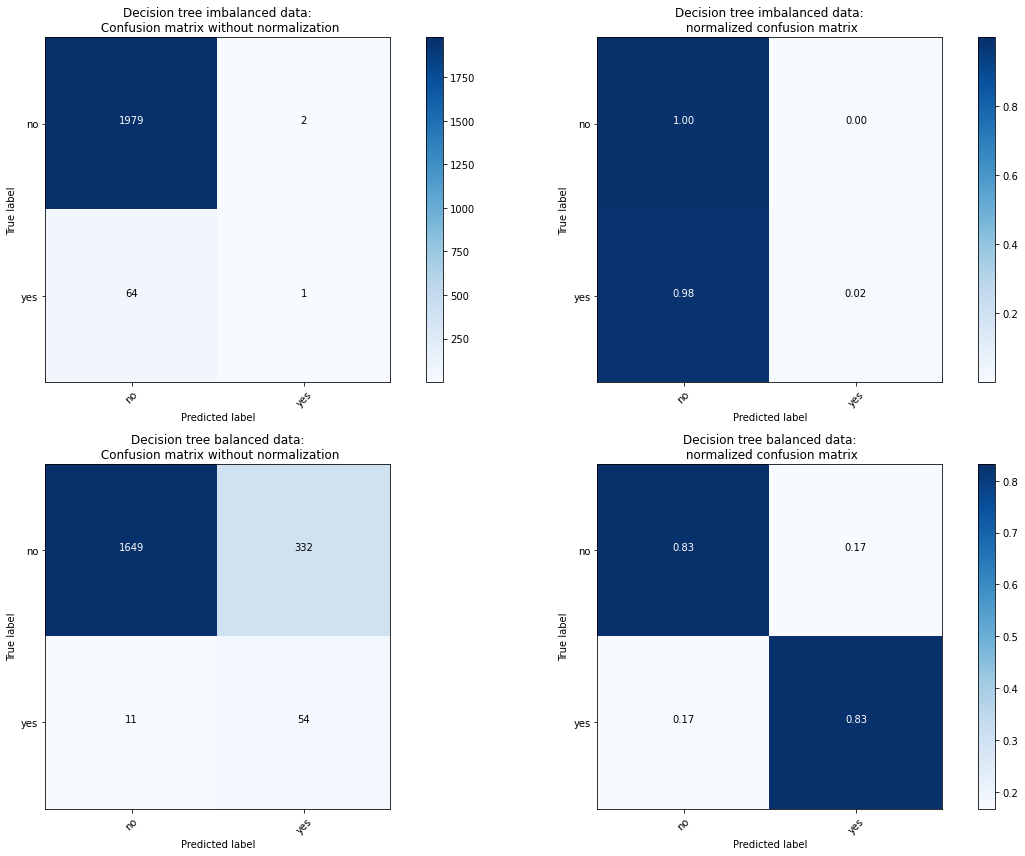

In [410]:
# Compute confusion matrix
class_names = ['no', 'yes']
cnf_matrix_imb = confusion_matrix(y_test, y_pred_imb)
cnf_matrix_bal = confusion_matrix(y_test, y_pred_bal)
cnf_matrix_svm = confusion_matrix(y_test, y_pred_svm_bal)
cnf_matrix_svm_imb = confusion_matrix(y_test, y_pred_svm_imb)
cnf_matrix_lr_imb = confusion_matrix(y_test, y_pred_lr_imb)
cnf_matrix_lr_bal = confusion_matrix(y_test, y_pred_lr_bal)

np.set_printoptions(precision=2)

plt.figure(figsize=(18, 12))

#Plot Decision Tree (imbalanced) confusion matrix
plt.subplot(221) 
plot_confusion_matrix(cnf_matrix_imb, classes=class_names,
                      title='Decision tree imbalanced data:\n Confusion matrix without normalization')

#Plot Decision Tree (imbalanced) normalized confusion matrix
plt.subplot(222) 
plot_confusion_matrix(cnf_matrix_imb, classes=class_names, normalize=True,
                      title='Decision tree imbalanced data:\n normalized confusion matrix')


#Plot Decision Tree (balanced) confusion matrix
plt.subplot(223) 
plot_confusion_matrix(cnf_matrix_bal, classes=class_names,
                      title='Decision tree balanced data:\n Confusion matrix without normalization')

#Plot Decision Tree (balanced) normalized onfusion matrix
plt.subplot(224) 
plot_confusion_matrix(cnf_matrix_bal, classes=class_names, normalize=True,
                      title='Decision tree balanced data:\n normalized confusion matrix')

plt.show()

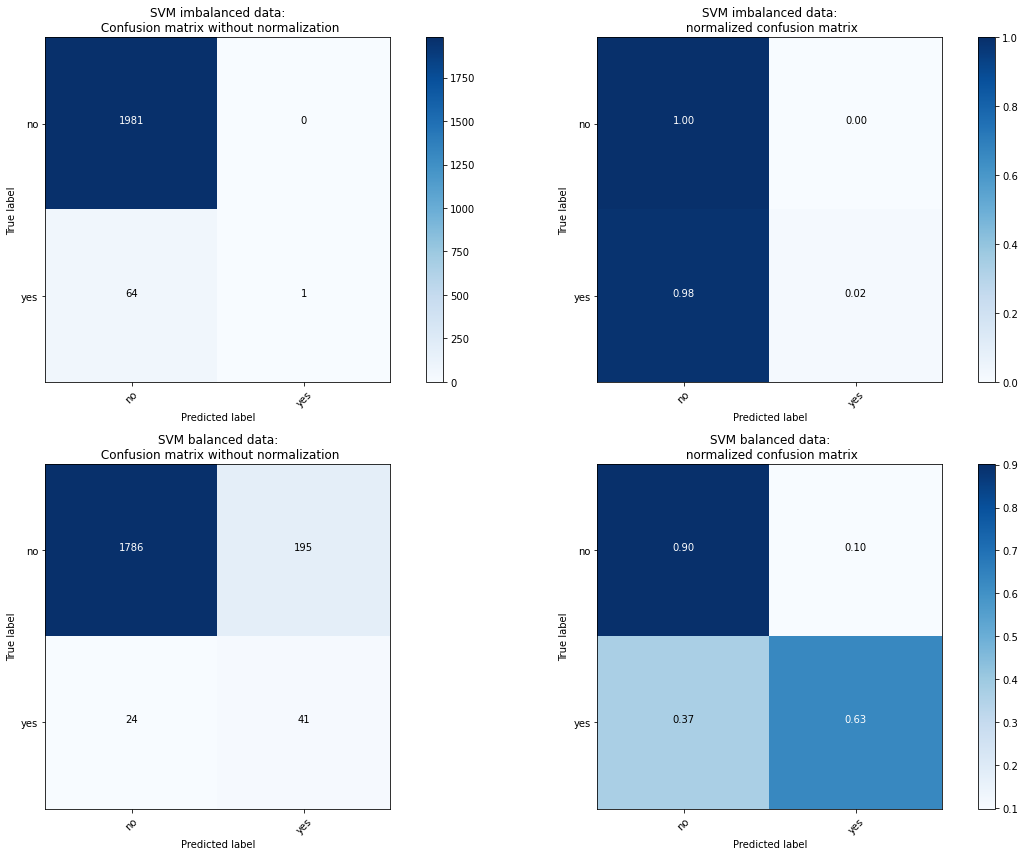

In [411]:
plt.figure(figsize = (18,12))
#Plot SVM imbalanced  confusion matrix
plt.subplot(221) 
plot_confusion_matrix(cnf_matrix_svm_imb, classes=class_names,
                      title='SVM imbalanced data:\n Confusion matrix without normalization')

#Plot SVM imbalanced normalized confusion matrix
plt.subplot(222) 
plot_confusion_matrix(cnf_matrix_svm_imb, classes=class_names, normalize=True,
                      title='SVM imbalanced data:\n normalized confusion matrix')

#Plot SVM balanced  confusion matrix
plt.subplot(223) 
plot_confusion_matrix(cnf_matrix_svm, classes=class_names,
                      title='SVM balanced data:\n Confusion matrix without normalization')

#Plot SVM balanced normalized confusion matrix
plt.subplot(224) 
plot_confusion_matrix(cnf_matrix_svm, classes=class_names, normalize=True,
                      title='SVM balanced data:\n normalized confusion matrix')
plt.show()

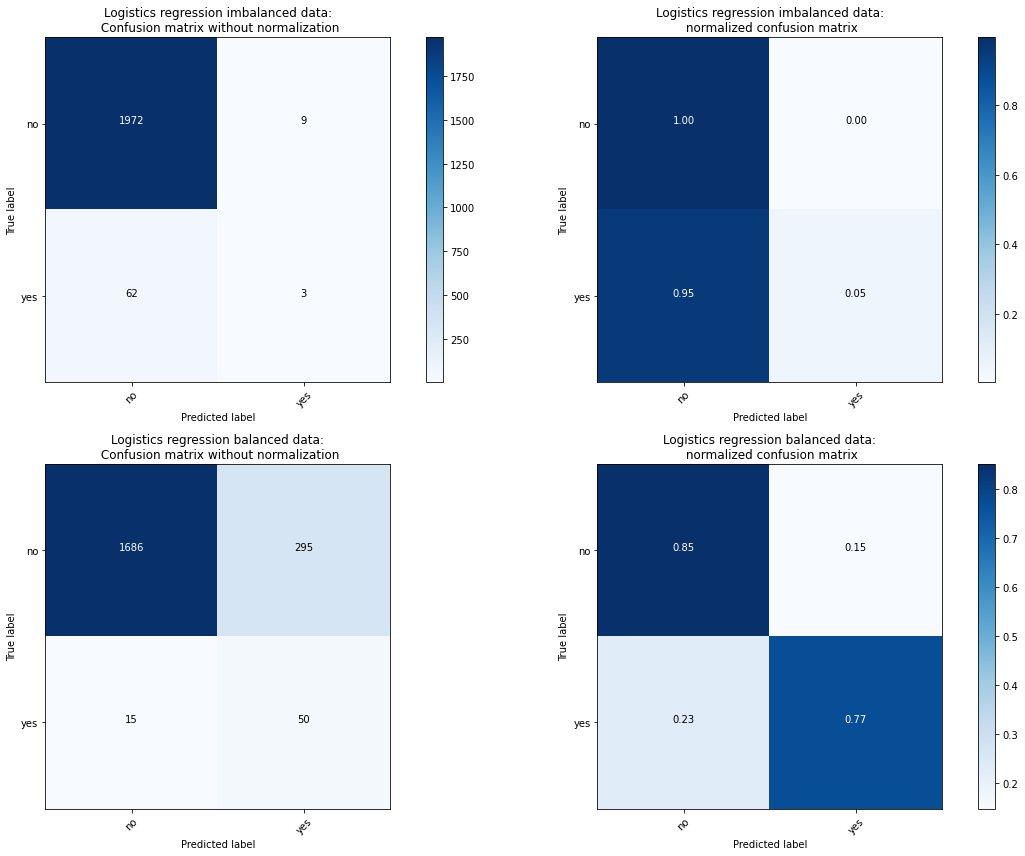

In [412]:
plt.figure(figsize=(18,12))
#Plot Logistics regression imbalanced confusion matrix
plt.subplot(221) 
plot_confusion_matrix(cnf_matrix_lr_imb, classes=class_names,
                      title='Logistics regression imbalanced data:\n Confusion matrix without normalization')

#Plot Logistics regression imbalanced nomalized confusion matrix
plt.subplot(222) 
plot_confusion_matrix(cnf_matrix_lr_imb, classes=class_names, normalize=True,
                      title='Logistics regression imbalanced data:\n normalized confusion matrix')
#Plot Logistics regression balanced confusion matrix
plt.subplot(223) 
plot_confusion_matrix(cnf_matrix_lr_bal, classes=class_names,
                      title='Logistics regression balanced data:\n Confusion matrix without normalization')

#Plot Logistics regression balanced confusion matrix
plt.subplot(224) 
plot_confusion_matrix(cnf_matrix_lr_bal, classes=class_names, normalize=True,
                      title='Logistics regression balanced data:\n normalized confusion matrix')
plt.show()

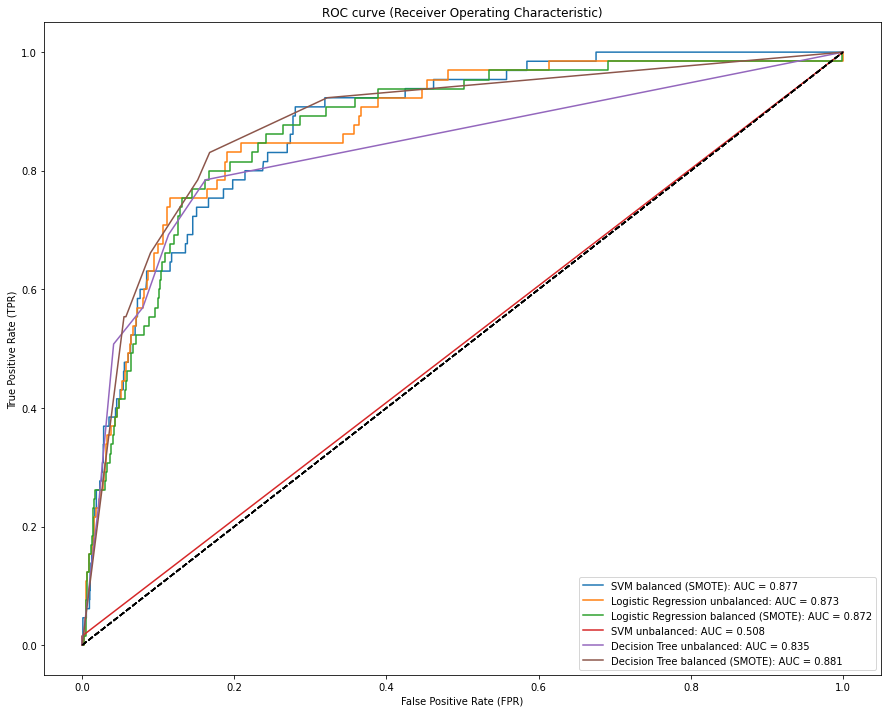

In [413]:
plt.figure(figsize=(15,12))

for test, pred, name in zip([y_test, y_test, y_test,y_test, y_test, y_test], [y_predProba_svm_bal[:,1], y_predProba_lr_imb[:,1], y_predProba_lr_bal[:,1],y_pred_svm_imb,y_predProba_imb[:,1], y_predProba_bal[:,1]], ['SVM balanced (SMOTE)', 'Logistic Regression unbalanced','Logistic Regression balanced (SMOTE)','SVM unbalanced','Decision Tree unbalanced','Decision Tree balanced (SMOTE)']):
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc='best')
    plt.plot([0,1],[0,1],color='black', linestyle='--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()

 Decision Tree model with rebalanced data clearly outperforms the Decision Tree model with unbalanced data

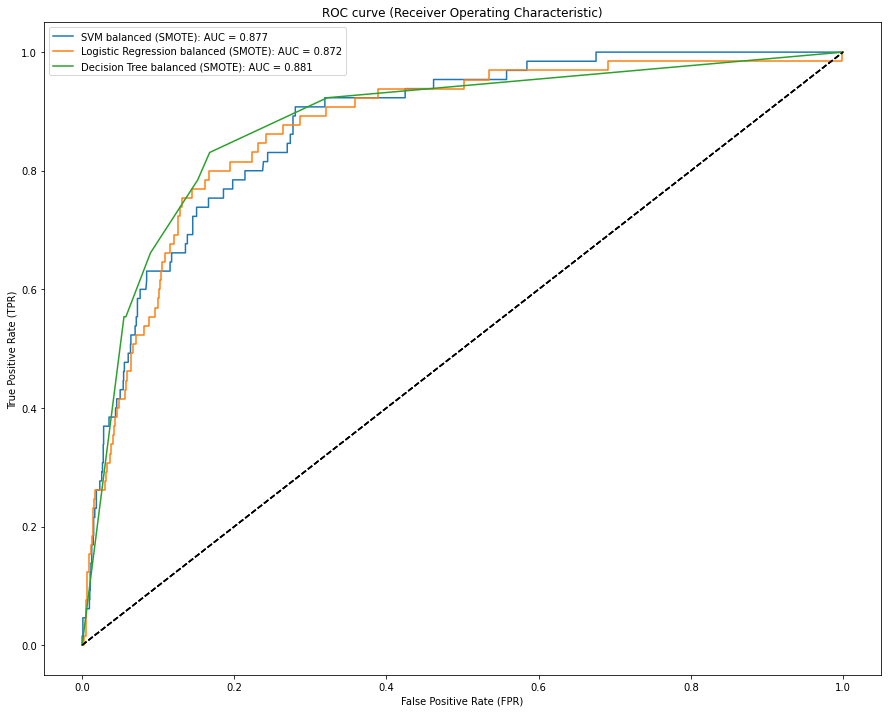

In [414]:
plt.figure(figsize=(15,12))

for test, pred, name in zip([y_test, y_test, y_test], [y_predProba_svm_bal[:,1], y_predProba_lr_bal[:,1], y_predProba_bal[:,1]], ['SVM balanced (SMOTE)', 'Logistic Regression balanced (SMOTE)','Decision Tree balanced (SMOTE)']):
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc='best')
    plt.plot([0,1],[0,1],color='black', linestyle='--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()